In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('HR_comma_sep.csv')

In [13]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
for column in df.columns:
    print(column, df[column].unique())

satisfaction_level [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]
last_evaluation [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]
number_project [2 5 7 6 4 3]
average_montly_hours [157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 132 294 134 145

In [15]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [16]:
df.rename(columns = {'sales':'domain'}, inplace = True)

In [17]:
X = df.drop(['left'], axis = 1)
Y = df[['left']]

In [18]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,domain,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [19]:
num = X[['satisfaction_level','last_evaluation','average_montly_hours']]
char = X[['number_project','time_spend_company','Work_accident','promotion_last_5years','domain','salary']]

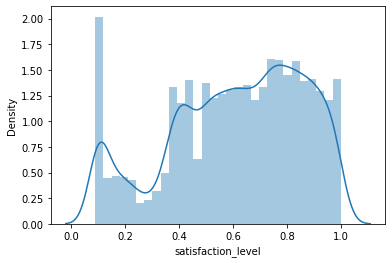

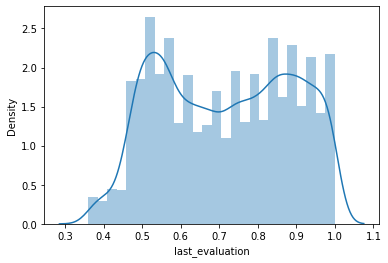

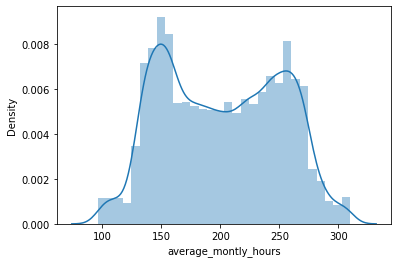

In [20]:
for column in num.columns:
    plt.figure()
    sns.distplot(num[column])

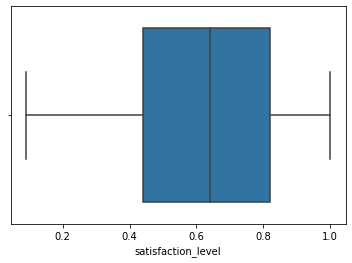

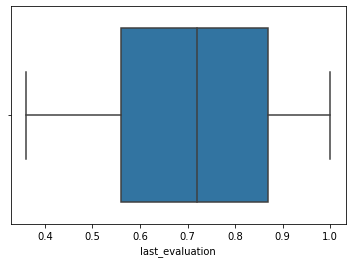

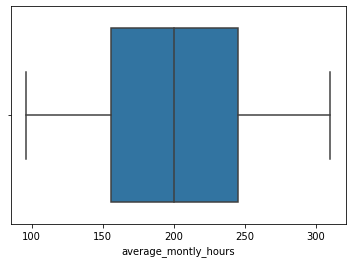

In [21]:
for column in num.columns:
    plt.figure()
    sns.boxplot(num[column])

In [22]:
X.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
domain                   0
salary                   0
dtype: int64

In [31]:
Y.mean()

left    0.238083
dtype: float64

In [24]:
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
num_binned = pd.DataFrame(kbins.fit_transform(num), columns = num.columns)

In [25]:
X_num_binned = pd.concat([num_binned,Y], axis = 1)

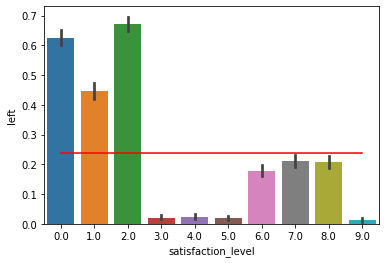

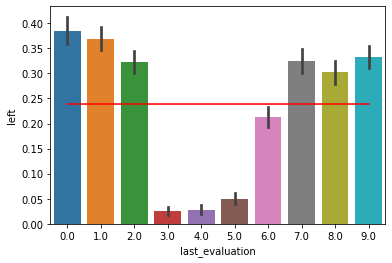

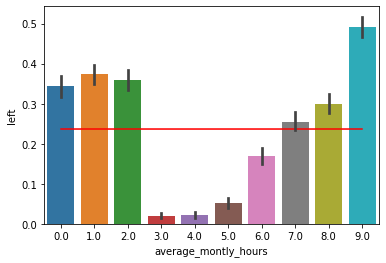

In [33]:
for column in num_binned.columns:
    plt.figure()
    sns.lineplot(x = column, y = 0.238083, data = X_num_binned, color = 'red')
    sns.barplot(x = column, y = "left", data = X_num_binned)

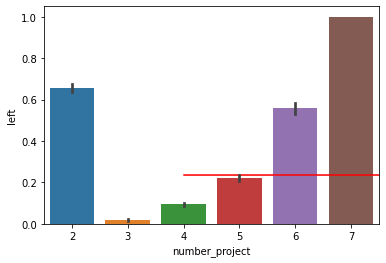

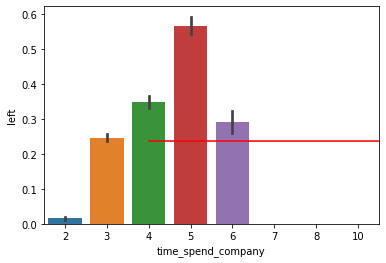

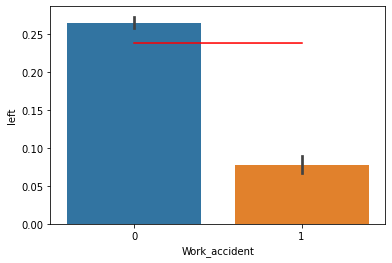

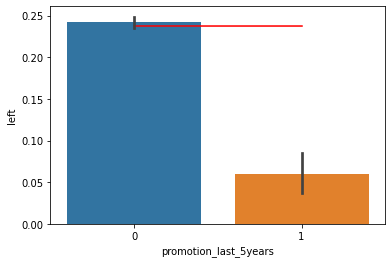

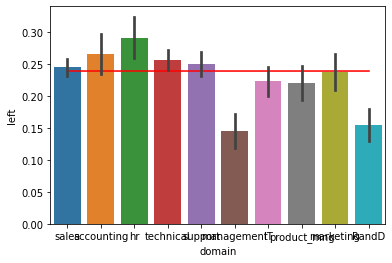

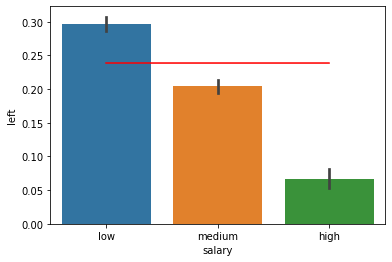

In [37]:
X_char = pd.concat([char,Y], axis = 1)
for column in char.columns:
    plt.figure()
    sns.lineplot(x = column, y = 0.238083, data = X_char, color = 'red')
    sns.barplot(x = column, y = "left", data = X_char)

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['domain'] = pd.DataFrame(le.fit_transform(X['domain']), columns = ['domain'])
X['salary'] = pd.DataFrame(le.fit_transform(X['salary']), columns = ['salary'])

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
char['domain'] = pd.DataFrame(le.fit_transform(char['domain']), columns = ['domain'])
char['salary'] = pd.DataFrame(le.fit_transform(char['salary']), columns = ['salary'])

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns = X.columns)

In [53]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k = 4)
selector.fit(char,Y)
cols = selector.get_support(indices=True)
char_best = char.iloc[:,cols]
char_best.columns

Index(['time_spend_company', 'Work_accident', 'promotion_last_5years',
       'domain'],
      dtype='object')

In [55]:
X.drop(['salary','number_project'], axis = 1, inplace=True)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [57]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
Y_prediction_log_reg = log_reg.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(Y_test,Y_prediction_log_reg))
print(classification_report(Y_test,Y_prediction_log_reg))
print(accuracy_score(Y_test,Y_prediction_log_reg))

[[3150  278]
 [ 809  263]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      3428
           1       0.49      0.25      0.33      1072

    accuracy                           0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.72      0.76      0.73      4500

0.7584444444444445


In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=25)
rfc.fit(X_train,Y_train)
Y_prediction_rfc = rfc.predict(X_test)
print(accuracy_score(Y_test,Y_prediction_rfc))
print(confusion_matrix(Y_test,Y_prediction_rfc))
print(classification_report(Y_test,Y_prediction_rfc))

0.9851111111111112
[[3409   19]
 [  48 1024]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3428
           1       0.98      0.96      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.98      0.97      0.98      4500
weighted avg       0.99      0.99      0.99      4500

